# 🌍 Air Quality Data Exploration

**Project:** Real-Time Air Quality Index Predictor

**Phase:** 2 - Exploratory Data Analysis

**Objective:** Understand the structure, quality, and basic patterns in our collected air quality data.

---

## 📋 Contents
1. Setup & Data Loading
2. Data Overview
3. Data Quality Assessment
4. Basic Statistics
5. City-Level Analysis
6. Temporal Patterns
7. Initial Insights

## 1. Setup & Data Loading

In [4]:
# Standard imports
import sys
from pathlib import Path

# Add project root to path
project_root = Path.cwd().parent if 'notebooks' in str(Path.cwd()) else Path.cwd()
sys.path.insert(0, str(project_root))

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Date/time handling
from datetime import datetime, timedelta

# Project modules
from src.data.cleaners import DataCleaner
from src.utils.config import get_config

# Configure visualization
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Libraries imported successfully!")
print(f"📁 Project root: {project_root}")


2025-10-29 10:36:43 | INFO     | src.utils.logger:setup:103 | Logging system initialized
2025-10-29 10:36:43 | INFO     | src.utils.logger:setup:104 | Log level: INFO
2025-10-29 10:36:43 | INFO     | src.utils.logger:setup:106 | Log directory: /Users/davideferreri/Documents/GitHub/City-Air-Quality-Index-Predictor-with-Live-Data-Pipeline/data/logs
✅ Libraries imported successfully!
📁 Project root: /Users/davideferreri/Documents/GitHub/City-Air-Quality-Index-Predictor-with-Live-Data-Pipeline


In [5]:
# Load data
print("Loading data...")

cleaner = DataCleaner()
df_raw = cleaner.load_all_raw_data()

print(f"✅ Loaded {len(df_raw)} raw records")

# Clean data
print("\nCleaning data...")
df = cleaner.clean_data(df_raw)

print(f"✅ Cleaned dataset: {len(df)} records")
print(f"📊 Data shape: {df.shape}")
print(f"🌍 Cities: {df['city_name'].nunique()}")

Loading data...
2025-10-29 10:36:49 | INFO     | src.data.cleaners:__init__:62 | DataCleaner initialized
2025-10-29 10:36:49 | INFO     | src.data.cleaners:load_all_raw_data:108 | Found 39 raw data files
2025-10-29 10:36:49 | INFO     | src.data.cleaners:load_all_raw_data:135 | Removed 18 duplicate records
2025-10-29 10:36:49 | INFO     | src.data.cleaners:load_all_raw_data:137 | Combined dataset: 216 records
✅ Loaded 216 raw records

Cleaning data...
2025-10-29 10:36:49 | INFO     | src.data.cleaners:clean_data:367 | Starting data cleaning pipeline
2025-10-29 10:36:49 | INFO     | src.data.cleaners:clean_data:368 | Input: 216 records, 14 columns
2025-10-29 10:36:49 | INFO     | src.data.cleaners:validate_schema:167 | Schema validation passed
2025-10-29 10:36:49 | INFO     | src.data.cleaners:validate_data_ranges:185 | Validating data ranges
2025-10-29 10:36:49 | INFO     | src.data.cleaners:handle_missing_values:232 | Handling missing values
2025-10-29 10:36:49 | INFO     | src.data.c

/Users/davideferreri/Documents/GitHub/City-Air-Quality-Index-Predictor-with-Live-Data-Pipeline/src/data/cleaners.py:250: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc[city_mask, pollutant_cols] = df.loc[city_mask, pollutant_cols].fillna(method='ffill', limit=3)
/Users/davideferreri/Documents/GitHub/City-Air-Quality-Index-Predictor-with-Live-Data-Pipeline/src/data/cleaners.py:250: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc[city_mask, pollutant_cols] = df.loc[city_mask, pollutant_cols].fillna(method='ffill', limit=3)
/Users/davideferreri/Documents/GitHub/City-Air-Quality-Index-Predictor-with-Live-Data-Pipeline/src/data/cleaners.py:250: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.loc[city_mask, p

## 2. Data Overview

In [6]:
# First look at the data
print("=" * 80)
print("FIRST 5 RECORDS")
print("=" * 80)
display(df.head())

FIRST 5 RECORDS


,timestamp,city_key,city_name,country,fetch_timestamp,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,hour,day_of_week,month,year,is_weekend,aqi_category,pm_total
39,2025-10-22 10:36:28,sydney,Sydney,Australia,2025-10-22T10:41:20.815949,2,102.57,0.10,1.06,65.38,0.66,9.03,22.71,0.39,10,2,10,2025,0,Fair,31.74
38,2025-10-22 10:38:46,sao_paulo,São Paulo,Brazil,2025-10-22T10:41:20.209305,1,67.99,0.00,0.49,53.78,0.26,1.00,3.52,0.10,10,2,10,2025,0,Good,4.52
36,2025-10-22 10:41:18,bangkok,Bangkok,Thailand,2025-10-22T10:41:18.811048,3,383.91,0.24,4.72,97.71,5.06,29.58,37.03,3.00,10,2,10,2025,0,Moderate,66.61
37,2025-10-22 10:41:19,durban,Durban,South Africa,2025-10-22T10:41:19.610936,2,206.52,0.03,3.65,47.33,3.02,15.64,24.98,1.85,10,2,10,2025,0,Fair,40.62
40,2025-10-22 10:41:21,london,London,United Kingdom,2025-10-22T10:41:21.586940,2,98.72,0.00,2.54,84.77,1.41,0.67,1.34,0.24,10,2,10,2025,0,Fair,2.01


In [7]:
# Data structure
print("=" * 80)
print("DATA STRUCTURE")
print("=" * 80)
print(f"\nShape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumns and types:")
print(df.dtypes)

print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

DATA STRUCTURE

Shape: 216 rows × 21 columns

Columns and types:
timestamp          datetime64[ns]
city_key                   object
city_name                  object
country                    object
fetch_timestamp            object
aqi                         int64
co                        float64
no                        float64
no2                       float64
o3                        float64
so2                       float64
pm2_5                     float64
pm10                      float64
nh3                       float64
hour                        int32
day_of_week                 int32
month                       int32
year                        int32
is_weekend                  int64
aqi_category               object
pm_total                  float64
dtype: object

Memory usage: 98.36 KB


In [8]:
# Date range
df['timestamp'] = pd.to_datetime(df['timestamp'])

print("=" * 80)
print("TIME COVERAGE")
print("=" * 80)
print(f"\nFirst record: {df['timestamp'].min()}")
print(f"Last record:  {df['timestamp'].max()}")
print(f"Duration:     {(df['timestamp'].max() - df['timestamp'].min()).days} days")
print(f"Total hours:  {len(df) / 6:.0f}")

TIME COVERAGE

First record: 2025-10-22 10:36:28
Last record:  2025-10-29 10:00:10
Duration:     6 days
Total hours:  36


## 3. Data Quality Assessment

In [9]:
# Missing values analysis
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)

print("\nMissing values per column:")
display(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("\n✅ No missing values! Perfect data quality!")
else:
    print(f"\n⚠️  Total missing: {missing_df['Missing Count'].sum()} values")

MISSING VALUES ANALYSIS

Missing values per column:


,Missing Count,Percentage



✅ No missing values! Perfect data quality!


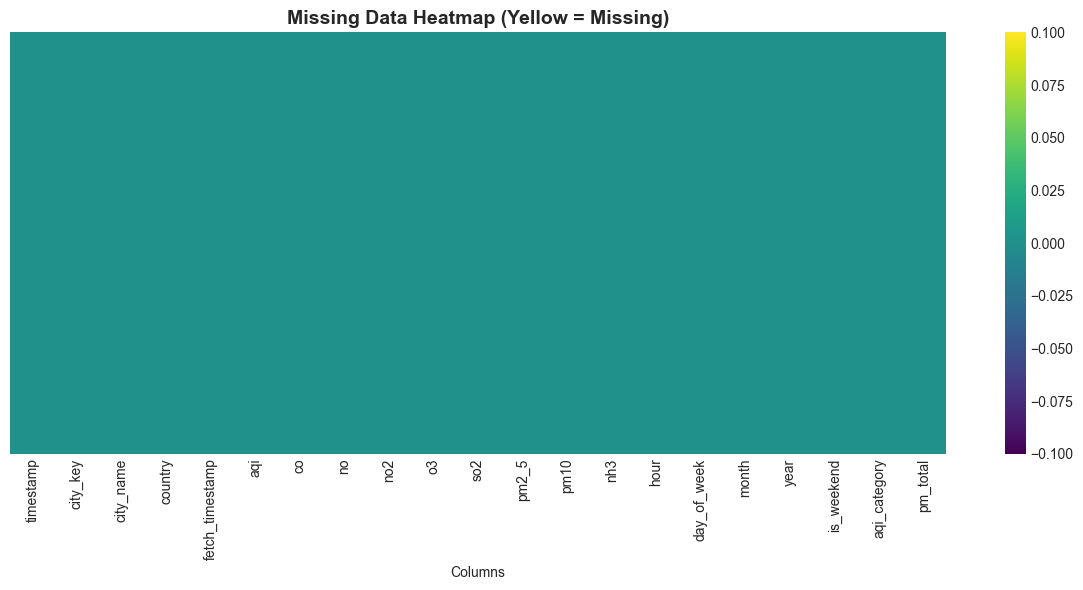

✅ All data present - the heatmap shows complete coverage!


In [10]:
# Visualize missing data
fig, ax = plt.subplots(figsize=(12, 6))

# Create heatmap of missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis', ax=ax)
ax.set_title('Missing Data Heatmap (Yellow = Missing)', fontsize=14, fontweight='bold')
ax.set_xlabel('Columns')

plt.tight_layout()
plt.show()

if df.isnull().sum().sum() == 0:
    print("✅ All data present - the heatmap shows complete coverage!")

## 4. Basic Statistics

In [11]:
# Statistical summary
print("=" * 80)
print("STATISTICAL SUMMARY - ALL POLLUTANTS")
print("=" * 80)

pollutants = ['aqi', 'pm2_5', 'pm10', 'no2', 'o3', 'co', 'so2']
display(df[pollutants].describe())

STATISTICAL SUMMARY - ALL POLLUTANTS


,aqi,pm2_5,pm10,no2,o3,co,so2
count,216.00,216.00,216.00,216.00,216.00,216.00,216.00
mean,1.55,7.00,9.68,3.92,55.71,141.54,1.28
std,0.64,9.56,10.85,5.30,21.30,91.53,1.06
min,1.00,0.57,1.27,0.14,17.57,59.65,0.09
25%,1.00,1.02,2.79,0.65,40.12,85.12,0.20
50%,1.00,3.00,5.97,1.97,50.83,99.97,1.18
75%,2.00,6.74,10.12,4.72,65.38,151.93,1.98
max,4.00,52.63,65.12,27.05,112.46,454.53,5.06


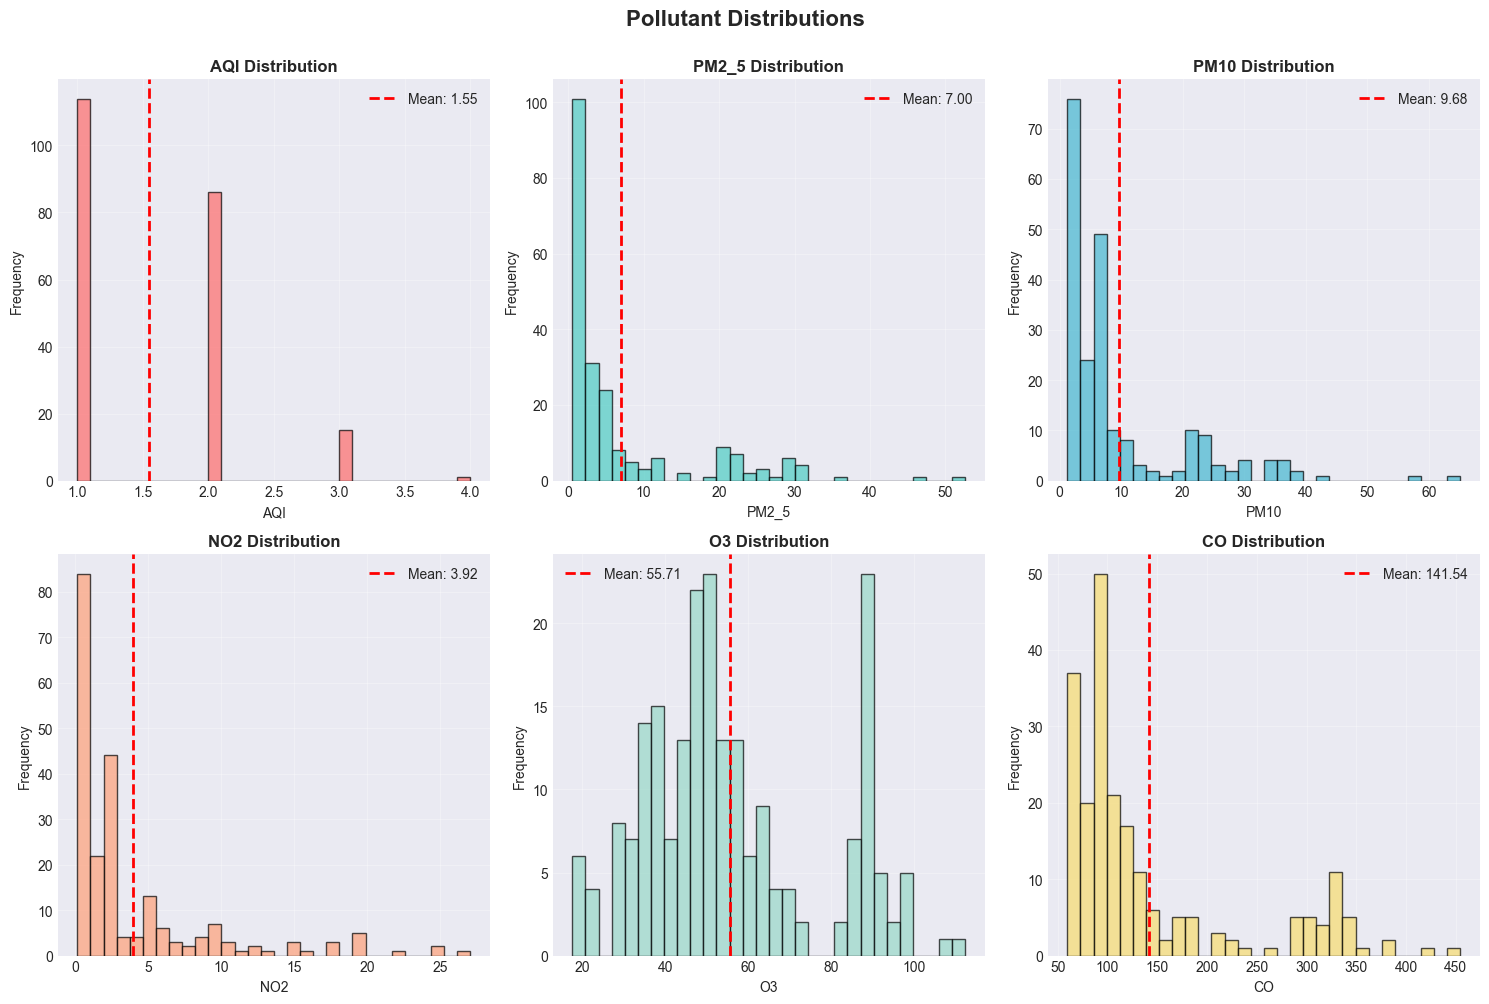

In [12]:
# Distribution plots for key pollutants
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Pollutant Distributions', fontsize=16, fontweight='bold', y=1.00)

pollutants_plot = ['aqi', 'pm2_5', 'pm10', 'no2', 'o3', 'co']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']

for idx, (pollutant, color) in enumerate(zip(pollutants_plot, colors)):
    ax = axes[idx // 3, idx % 3]
    
    df[pollutant].hist(bins=30, ax=ax, color=color, edgecolor='black', alpha=0.7)
    ax.set_title(f'{pollutant.upper()} Distribution', fontweight='bold')
    ax.set_xlabel(pollutant.upper())
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)
    
    # Add mean line
    mean_val = df[pollutant].mean()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.legend()

plt.tight_layout()
plt.show()

In [13]:
# AQI distribution
print("=" * 80)
print("AIR QUALITY INDEX (AQI) BREAKDOWN")
print("=" * 80)

aqi_labels = {
    1: 'Good',
    2: 'Fair',
    3: 'Moderate',
    4: 'Poor',
    5: 'Very Poor'
}

aqi_counts = df['aqi'].value_counts().sort_index()
aqi_pcts = (aqi_counts / len(df) * 100).round(1)

print("\nAQI Distribution:")
for aqi_val in sorted(df['aqi'].unique()):
    count = aqi_counts.get(aqi_val, 0)
    pct = aqi_pcts.get(aqi_val, 0)
    label = aqi_labels.get(aqi_val, 'Unknown')
    emoji = '🟢' if aqi_val <= 2 else '🟡' if aqi_val == 3 else '🔴'
    print(f"   {emoji} AQI {aqi_val} ({label:12s}): {count:3d} records ({pct:5.1f}%)")

print(f"\nMost common: {aqi_labels[aqi_counts.idxmax()]} (AQI {aqi_counts.idxmax()})")

AIR QUALITY INDEX (AQI) BREAKDOWN

AQI Distribution:
   🟢 AQI 1 (Good        ): 114 records ( 52.8%)
   🟢 AQI 2 (Fair        ):  86 records ( 39.8%)
   🟡 AQI 3 (Moderate    ):  15 records (  6.9%)
   🔴 AQI 4 (Poor        ):   1 records (  0.5%)

Most common: Good (AQI 1)


## 5. City level analysis

In [14]:
# City-wise air quality comparison
print("=" * 80)
print("AVERAGE AIR QUALITY BY CITY")
print("=" * 80)

city_stats = df.groupby('city_name').agg({
    'aqi': ['mean', 'std', 'min', 'max'],
    'pm2_5': 'mean',
    'pm10': 'mean',
    'no2': 'mean'
}).round(2)

city_stats.columns = ['AQI_Mean', 'AQI_Std', 'AQI_Min', 'AQI_Max', 'PM2.5_Avg', 'PM10_Avg', 'NO2_Avg']
city_stats = city_stats.sort_values('AQI_Mean', ascending=False)

print("\nCity rankings (worst to best):")
display(city_stats)

print("\n🏆 CLEANEST CITY:", city_stats['AQI_Mean'].idxmin())
print("⚠️  MOST POLLUTED:", city_stats['AQI_Mean'].idxmax())

AVERAGE AIR QUALITY BY CITY

City rankings (worst to best):


,AQI_Mean,AQI_Std,AQI_Min,AQI_Max,PM2.5_Avg,PM10_Avg,NO2_Avg
city_name,,,,,,,
Bangkok,2.47,0.56,2,4,26.31,30.15,5.65
London,2.00,0.00,2,2,1.31,3.73,2.24
São Paulo,1.56,0.50,1,2,7.04,8.77,0.67
Durban,1.11,0.32,1,2,3.99,8.14,1.44
New York City,1.11,0.32,1,2,2.15,4.10,13.03
Sydney,1.06,0.23,1,2,1.19,3.17,0.51



🏆 CLEANEST CITY: Sydney
⚠️  MOST POLLUTED: Bangkok


## 6. Temporal patterns

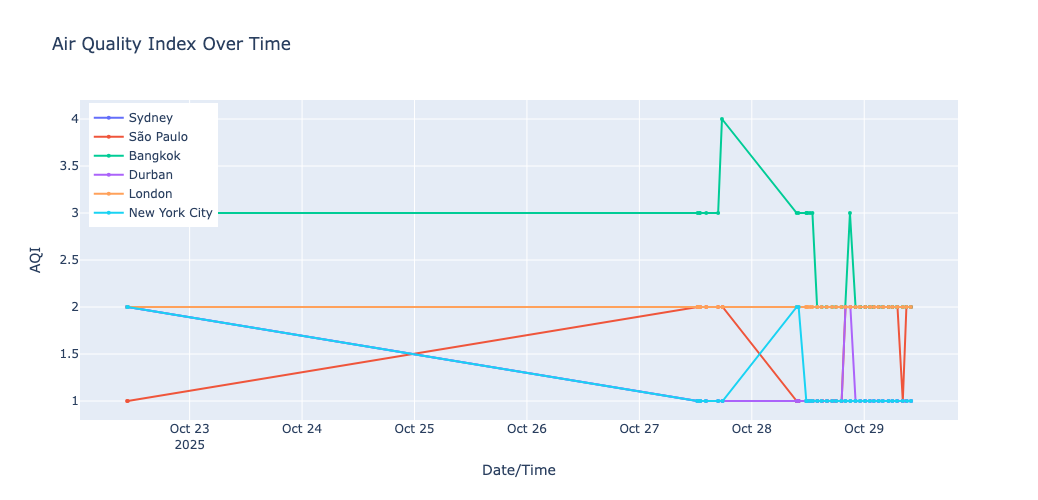

In [15]:
# Time series plot - AQI over time
fig = go.Figure()

for city in df['city_name'].unique():
    city_data = df[df['city_name'] == city].sort_values('timestamp')
    
    fig.add_trace(go.Scatter(
        x=city_data['timestamp'],
        y=city_data['aqi'],
        mode='lines+markers',
        name=city,
        line=dict(width=2),
        marker=dict(size=4)
    ))

fig.update_layout(
    title='Air Quality Index Over Time',
    xaxis_title='Date/Time',
    yaxis_title='AQI',
    height=500,
    hovermode='x unified',
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
)

fig.show()

## 7. Initial insights

In [16]:
# Key findings summary
print("=" * 80)
print("KEY INSIGHTS FROM YOUR DATA")
print("=" * 80)

insights = []

# Data quality
completeness = ((1 - df.isnull().sum() / len(df)) * 100).mean()
insights.append(f"✅ Data Quality: {completeness:.1f}% complete - excellent quality!")

# Collection progress
duration = (df['timestamp'].max() - df['timestamp'].min()).days
insights.append(f"📅 Collection Duration: {duration} days with {len(df)} records")

# City insights
best_city = city_stats['AQI_Mean'].idxmin()
worst_city = city_stats['AQI_Mean'].idxmax()
insights.append(f"🏆 Cleanest City: {best_city} (avg AQI: {city_stats.loc[best_city, 'AQI_Mean']:.2f})")
insights.append(f"⚠️  Most Polluted: {worst_city} (avg AQI: {city_stats.loc[worst_city, 'AQI_Mean']:.2f})")

# Pollutant insights
avg_pm25 = df['pm2_5'].mean()
who_guideline = 15  # WHO annual guideline
if avg_pm25 > who_guideline:
    insights.append(f"⚠️  Average PM2.5 ({avg_pm25:.1f}) exceeds WHO guidelines ({who_guideline})")
else:
    insights.append(f"✅ Average PM2.5 ({avg_pm25:.1f}) within WHO guidelines ({who_guideline})")

# AQI distribution
good_pct = (df['aqi'] <= 2).sum() / len(df) * 100
insights.append(f"📊 {good_pct:.1f}% of measurements show 'Good' or 'Fair' air quality")

print("\n" + "\n".join(insights))

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE! 🎉")
print("=" * 80)

KEY INSIGHTS FROM YOUR DATA

✅ Data Quality: 100.0% complete - excellent quality!
📅 Collection Duration: 6 days with 216 records
🏆 Cleanest City: Sydney (avg AQI: 1.06)
⚠️  Most Polluted: Bangkok (avg AQI: 2.47)
✅ Average PM2.5 (7.0) within WHO guidelines (15)
📊 92.6% of measurements show 'Good' or 'Fair' air quality

ANALYSIS COMPLETE! 🎉
